# EDA ON AMAZON REVIEW DATASET(MAGAZINE_SUBSCRIPTION)

In [1]:
import findspark
findspark.init("C:\\Users\\Arvind\\Downloads\\spark-3.0.0-preview2-bin-hadoop2.7")

#System.setProperty("hadoop.home.dir", "E:\software\spark-3.0.0-preview2-bin-hadoop2.7\spark-3.0.0-preview2-bin-hadoop2.7\winutils.exe");


## LOADING DATA 

### INITIALIZING PYSPARK

In [2]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession

EXE_MEMORY = "1g"
DRIVER_MEMORY = "4g"
spark = SparkSession.builder.appName("AWSNLP").config("spark.executor.memory", EXE_MEMORY).config("spark.executor.cores", "3").config("spark.driver.memory", DRIVER_MEMORY).getOrCreate()

## LOADING DATA

In [3]:
json_rdd = spark.read.json('C:\\Users\\Arvind\\Downloads\\Magazine_Subscriptions.json')

## SCHEMA OF DATA

In [4]:
json_rdd.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Format:: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)
 |-- verified: boolean (nullable = true)
 |-- vote: string (nullable = true)



## READING DATA

In [4]:
json_rdd.show(2)

+----------+-----+-------+--------------------+-----------+-------------+---------------+-----+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|   reviewerID|   reviewerName|style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+-------------+---------------+-----+--------------------+--------------+--------+----+
|B00005N7P0| null|    5.0|for computer enth...| 11 8, 2001|AH2IFH762VY5U|   ted sedlmayr| null|AVID READER SINCE...|    1005177600|   false|   9|
|B00005N7P0| null|    5.0|Thank god this is...|10 31, 2001|AOSFI0JEYU4XM|Amazon Customer| null|  The straight scoop|    1004486400|   false|   9|
+----------+-----+-------+--------------------+-----------+-------------+---------------+-----+--------------------+--------------+--------+----+
only showing top 2 rows



In [7]:
df=json_rdd.select('overall','reviewText')

## INDEXING AFTER SELECTION OF TWO VARIABLES 

As reviewerID is not unique therefore indexed the data. 

In [9]:
from pyspark.sql.window import Window as W
from pyspark.sql import functions as F
df1 = df.withColumn("idx", F.monotonically_increasing_id())
windowSpec = W.orderBy("idx")
df1.withColumn("idx", F.row_number().over(windowSpec)).show()

+-------+--------------------+---+
|overall|          reviewText|idx|
+-------+--------------------+---+
|    5.0|for computer enth...|  1|
|    5.0|Thank god this is...|  2|
|    3.0|Antiques Magazine...|  3|
|    5.0|This beautiful ma...|  4|
|    5.0|A great read ever...|  5|
|    3.0|This magazine was...|  6|
|    5.0|I've read Maximum...|  7|
|    5.0|We ordered this m...|  8|
|    4.0|I have subscribed...|  9|
|    4.0|I'm old, and so i...| 10|
|    5.0|At one time, this...| 11|
|    2.0|I didn't receive ...| 12|
|    5.0|It was inexpensiv...| 13|
|    5.0|These periodicals...| 14|
|    4.0|So helpful.  A gr...| 15|
|    5.0|Best magazine for...| 16|
|    5.0|My husband likes ...| 17|
|    5.0|I love this magaz...| 18|
|    3.0|I am getting sick...| 19|
|    5.0|I can recommend M...| 20|
+-------+--------------------+---+
only showing top 20 rows



In [136]:
df2=json_rdd.select("overall")
df2=df2.groupby('overall').count().sort('overall')

In [137]:
#type(df2)
pd1=df2.toPandas()
pd1.head()

,overall,count
0,1.0,11029
1,2.0,5223
2,3.0,6971
3,4.0,12676
4,5.0,53790


## OVERALL VARIABLE FREQUENCY CHART

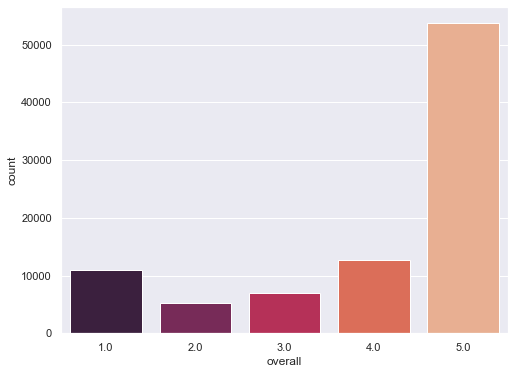

In [140]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
import seaborn as sns
# Get a color map
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
#my_cmap = cm.get_cmap('jet')
sns.barplot(data=pd1, x='overall',y='count', palette="rocket")


In [50]:
aws_df = json_rdd.select( 'reviewText')

In [26]:
aws_df.show(5)

+--------------------+
|          reviewText|
+--------------------+
|for computer enth...|
|Thank god this is...|
|Antiques Magazine...|
|This beautiful ma...|
|A great read ever...|
+--------------------+
only showing top 5 rows



In [27]:
selective_aws_df.createOrReplaceTempView("selective_aws_df")
    

## COUNTING WORDS IN EACH SENTENCE

In [198]:
from pyspark.sql import functions as F
def countWordsInEachSentences(array):
    return [len(x.split()) for x in array]

countWordsSentences = F.udf(lambda x: countWordsInEachSentences(x.split('. ')))

selective_aws_df.withColumn("word_count", countWordsSentences(selective_aws_df['reviewText'])).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## COUNTING TOTAL NUMBER OF WORDS 

ReviewText variable f dataset has 3920235 total number of words.

In [78]:
import pyspark.sql.functions as f
df5 = df_sent.withColumn('wordCount', f.size(f.split(f.col('reviewText'), ' ')))
df5.show()

+--------------------+---------+
|          reviewText|wordCount|
+--------------------+---------+
|for computer enth...|      173|
|Thank god this is...|       51|
|Antiques Magazine...|      397|
|This beautiful ma...|       56|
|A great read ever...|        5|
|This magazine was...|       28|
|I've read Maximum...|      317|
|We ordered this m...|       22|
|I have subscribed...|       28|
|I'm old, and so i...|       34|
|At one time, this...|       85|
|I didn't receive ...|       25|
|It was inexpensiv...|       44|
|These periodicals...|       20|
|So helpful.  A gr...|       26|
|Best magazine for...|       34|
|My husband likes ...|       23|
|I love this magaz...|       66|
|I am getting sick...|       39|
|I can recommend M...|       30|
+--------------------+---------+
only showing top 20 rows



In [80]:
import pyspark.sql.functions as f
df5.select(f.sum('wordCount')).collect()


[Row(sum(wordCount)=3920235)]

In [90]:
df7=df5.select('wordCount')
df8=df7.toPandas()

## Histogram showing most of the reviews are less than 50 number of words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001877AE0B748>]],
      dtype=object)

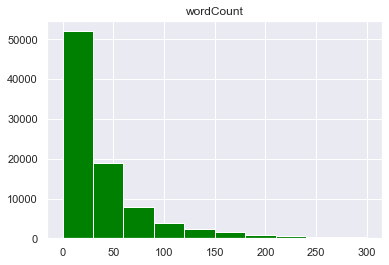

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df8.hist('wordCount',range=(0,300), color='green')

## TOTAL NUMBER OF CHARACTERS

There are total 21871568 number of characters in reviewText.

In [94]:
#Charachter count by column
import pyspark.sql.functions as f

df9=aws_df.withColumn('Char', f.explode(f.split(f.col('reviewText'), '')))\
    .groupBy('Char')\
    .count()\
    .sort('Count', ascending=False)

In [95]:
import pyspark.sql.functions as f

df9.select(f.sum('Count')).collect()

[Row(sum(Count)=21871568)]

In [96]:
df9.show(5)

+----+-------+
|Char|  count|
+----+-------+
|    |3830579|
|   e|2042327|
|   t|1511087|
|   a|1408099|
|   o|1273435|
+----+-------+
only showing top 5 rows



In [ ]:
import pyspark.sql.functions as F
df.withColumn('Col2', F.length('Col1')).show()

## WORD FREQUENCY

WORD The has highest frequency in variable reviewText i.e., 153152.

In [97]:
import pyspark.sql.functions as f
df9=df_sent.withColumn('word', f.explode(f.split(f.col('reviewText'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)

In [98]:
df9.show()

+--------+------+
|    word| count|
+--------+------+
|     the|153152|
|       I|113953|
|     and|111100|
|      to|106187|
|       a| 88923|
|        | 76732|
|      of| 74153|
|      is| 58929|
|     for| 56338|
|      it| 45794|
|magazine| 43504|
|      in| 42082|
|    this| 41617|
|    that| 36556|
|      my| 33355|
|      on| 29884|
|    have| 28355|
|     are| 26248|
|    with| 24159|
|     you| 23798|
+--------+------+
only showing top 20 rows



In [123]:
df10=df9.limit(55).toPandas()

In [110]:
df10.head()

,word,count
0,the,153152
1,I,113953
2,and,111100
3,to,106187
4,a,88923


## PLOT OF TOP 55 HIGHEST FREQUENCY WORDS IN REVIEWTEXT

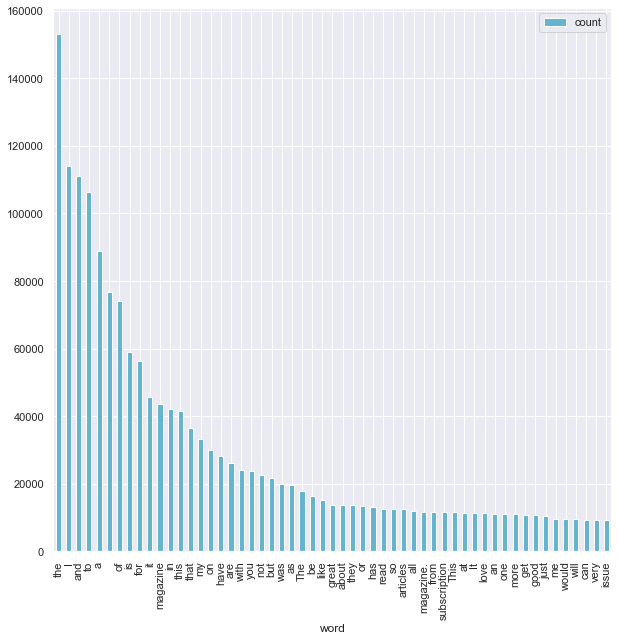

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
df10.plot(kind='bar', x='word', y='count',figsize=(10,10), color="c")